In [4]:
import plots
import tables
import json
import matplotlib.pyplot as plt
import numpy as np
import json


SString = "StatResults/Sampled/"
sString = "StatResults/"
incon = "/InconsistencyStatistics.json"
kbStaaa = "/kbStatistics.json"

Colors = ['#3cb44b','#e6194b', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6','#ffe119', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [5]:
FileListInconsistency = 	   [sString+'DBpedia'+incon,
								sString+'Yago'+incon,
								sString+'dblp-2012-11-28b'+incon]
FileListKB =            	   [sString+'DBpedia'+kbStaaa,
								sString+'Yago'+kbStaaa,
								sString+'dblp-2012-11-28b'+kbStaaa]


In [10]:
FileListInconsistency = 	   [sString+'DBpedia'+incon,
								sString+'Yago'+incon,
								sString+'LOD'+incon]
FileListKB =            	   [sString+'DBpedia'+kbStaaa,
								sString+'Yago'+kbStaaa]

In [28]:

def plotting(FileListInconsistency, FileListKB, Sample):
    counter = 0
    ColorScheme = {}
    labels1 = []
    labels2 = []
    width = (1-0.1)/len(FileListInconsistency)
    for file in FileListInconsistency:
        print(file)
        datasetName = file.split("/")[-2]
        ColorScheme[datasetName] = Colors[len(ColorScheme.keys())]
        print(ColorScheme[datasetName])
        labels1.append(datasetName)
        json_file = open(file, 'r')
        data = json.load(json_file)
        IDCoor = []
        Size = [i for i in range(0,25)]
        SizeCount = [0 for i in range(0,25)]
        SizeCoor = []
        SizeSum = [0 for i in range(0,25)]
        CountCoor = []
        for elem in data:
            CountCoor.append(elem["Count"])
            SizeCoor.append(elem["Size"])
            IDCoor.append(elem["id"])
            if(elem["Count"] > 0):
                SizeCount[elem["Size"]] += 1

            SizeSum[elem["Size"]] += elem["Count"]
        plt.figure(1)
        plt.title('Plot showing the Distribution of Size')
        plt.plot(Size, SizeCount, color=ColorScheme[datasetName])
        plt.ylabel('Amount of "Anti-patterns"')
        plt.xlabel('Size of the "Anti-pattern"')

        plt.figure(2)

        SizeSum[:] = [x / float(sum(SizeSum)+0.0000001) for x in SizeSum]
        plt.title('Plot showing the normalised Distribution of Occurences')
        Size = np.arange(0,25)
        try:
            plt.bar(Size+width*counter, SizeSum, width, color=ColorScheme[datasetName])
        except:
            pass
        counter += 1
        plt.ylabel('Occurrences of the "Anti-pattern"')
        plt.xlabel('Size of the "Anti-pattern"')

        CountCoor.sort(reverse = True)
#          CountCoor[:] = [x / float(sum(CountCoor)+0.0000001) for x in CountCoor]
        if (datasetName == "Yago"):
            CountCoor[:] = [x / 100 for x in CountCoor]
        CountCoorElem = []
        for x in CountCoor:
            if (x >= 1):
                CountCoorElem.append(round(x))
        print(CountCoorElem)
        plt.figure(3)
        plt.title('Plot showing the Distribution of Occurences')
        plt.plot( CountCoorElem, color=ColorScheme[datasetName])
        plt.ylabel('Occurrences of the "Anti-pattern"')
        plt.xlabel('"Anti-pattern" type')

    ColorScheme = {'dbpedia2016-04en': '#4363d8', 'yago2s': '#f58231', 'dblp-2012-11-28b': '#e6194b'} 
    for file in FileListKB:
        json_file = open(file, 'r')
        data = json.load(json_file)

        datasetName = file.split("/")[-2]
        labels2.append(datasetName)
        if not(datasetName in ColorScheme):
            ColorScheme[datasetName] = Colors[len(ColorScheme.keys())]
        XcoorIn = []
        YcoorIn = []
        for key in sorted(data["InDegree"].keys(), key=int):
            XcoorIn.append(int(key))
            YcoorIn.append(int(data["InDegree"][key]))

        plt.figure(4)
        plt.title('Plot showing the Distribution of the nodes with inlinks')
        plt.plot(XcoorIn, YcoorIn, color=ColorScheme[datasetName])
        plt.ylabel('Occurences of the nodes with inlinks')
        plt.xlabel('Amount of inlinks towards the node')


        XcoorOut = []
        YcoorOut = []
        for key in sorted(data["OutDegree"].keys(), key=int):
            XcoorOut.append(int(key))
            YcoorOut.append(int(data["OutDegree"][key]))

        plt.figure(5)
        plt.title('Plot showing the Distribution of the nodes with outlinks')
        plt.plot(XcoorOut, YcoorOut, color=ColorScheme[datasetName])
        plt.ylabel('Occurences of the nodes with equal outlinks')
        plt.xlabel('Amount of outlinks outwards the node')

        XcoorCluster = []
        YcoorCluster = []

        for key in sorted(data["ClusteringCoefficient"].keys(), key=float):
            XcoorCluster.append(float(key))
            YcoorCluster.append(int(data["ClusteringCoefficient"][key]))
        # xnew = np.linspace(min(XcoorCluster),max(XcoorCluster),300) #300 represents number of points to make between T.min and T.max

        # power_smooth = spline(XcoorCluster,YcoorCluster,xnew)
        plt.figure(6)
        plt.title('Plot showing the Distribution of the nodes with equal ClusteringCoefficient')
        #plt.plot(xnew,power_smooth, color=ColorScheme[datasetName])
        plt.plot(XcoorCluster, YcoorCluster, color=ColorScheme[datasetName])
        plt.ylabel('Occurences of the nodes with equal ClusteringCoefficient')
        plt.xlabel('ClusteringCoefficient of the node')



    for current in plt.get_fignums():


        plt.figure(current)
        # Remove the plot frame lines. They are unnecessary chartjunk.
        ax = plt.subplot(111)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        if current == 1:
            pass
        elif current == 2:
            ax.set_yscale("log")
        elif current == 3:
            ax.set_yscale("log")
        else:
            ax.set_yscale("log")
            ax.set_xscale("log")

        if(current > 3):
            ax.legend(labels2)
        else:
            ax.legend(labels1)

        # Ensure that the axis ticks only show up on the bottom and left of the plot.
        # Ticks on the right and top of the plot are generally unnecessary chartjunk.
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        elemPLT = int(current)
        plt.savefig("plots/figure%d.eps" % elemPLT, bbox_inches="tight", format='eps', dpi=500)
        plt.savefig("plots/"+Sample+'figure%d.png' % current, bbox_inches="tight")


In [8]:



def tabling(FileListInconsistency, FileListKB):
    print("""\\begin{table}[ht]
\\begin{tabular}{|l|l|l|l|}
\\hline
           & Amount of 'Anti-patterns' & sum of 'Anti-patterns' &  Largest Inconsistency  \\\\ \\hline \\hline """)

    for file in FileListInconsistency:
        dataset = file.split("/")[-2]
        json_file = open(file, 'r')
        data = json.load(json_file)
        IDCoor = []
        SizeCoor = []
        CountCoor = []
        for elem in data:
            CountCoor.append(elem["Count"])
            SizeCoor.append(elem["Size"])
            IDCoor.append(elem["id"])

        AmountOfAntiPatterns = sum(i > 0 for i in CountCoor)

        print("     "+" & ".join([str(dataset),str(AmountOfAntiPatterns),str(sum(CountCoor)),str(max(SizeCoor))])+"\\\\ \\hline")

    print("""\\end{tabular}
\\end{table}""")

    print("")

    print("""\\begin{table}[ht]
\\begin{tabular}{|l|l|l|l|l|}
\\hline
           & Size & Expressivity & Namespaces & Distinct predicates \\\\ \\hline \\hline""")

    for file in FileListKB:
        dataset = file.split("/")[-2]
        json_file = open(file, 'r')
        data = json.load(json_file)
        print("     "+" & ".join([str(dataset),str(data["Size"]),str(data["Expressivity"]),str(len(data["Predicates"])),str(len(data["Namespaces"]))])+"\\\\ \\hline")
    print("""\\end{tabular}
\\end{table}""")


StatResults/DBpedia/InconsistencyStatistics.json
#3cb44b
[32997, 18189, 14847, 9171, 8408, 6762, 4469, 2608, 1988, 1758, 144, 7, 1]
StatResults/Yago/InconsistencyStatistics.json
#e6194b
[379546, 374662, 362412, 359632, 358226, 356157, 332848, 325604, 323229, 317703, 314829, 312138, 302498, 302497, 294248, 292959, 290454, 287671, 286093, 285571, 278318, 264952, 260582, 255171, 248372, 248038, 248038, 245587, 243492, 233722, 233056, 230103, 228809, 226475, 222980, 220784, 214579, 212961, 211470, 210442, 205828, 200790, 197382, 197337, 189285, 188060, 187087, 182615, 179690, 173574, 167786, 167201, 164994, 163946, 163270, 159084, 155823, 148383, 145371, 142696, 140354, 137546, 137385, 135702, 133267, 132700, 131141, 106698, 106698, 106698, 106426, 103557, 98159, 97851, 97841, 96621, 93576, 92731, 88360, 83851, 78842, 78323, 74294, 74282, 73812, 73067, 68874, 68803, 66812, 64272, 55081, 47326, 44493, 42552, 39046, 38946, 30712, 20895, 19757, 19757, 19173, 17991, 11394, 9810, 8952, 8838, 87

/home/thomasdegroot/.local/lib/python3.6/site-packages/ipykernel_launcher.py:120: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support trans

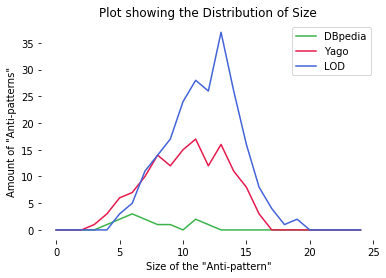

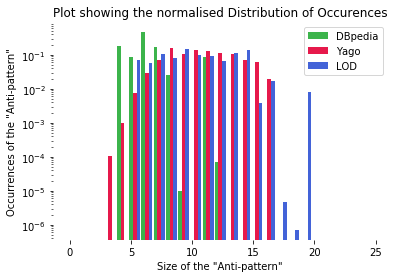

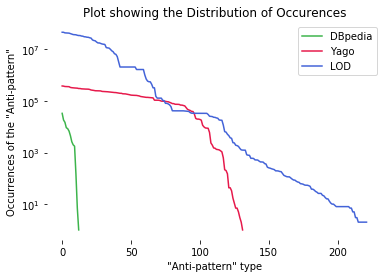

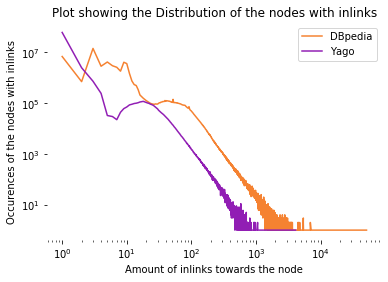

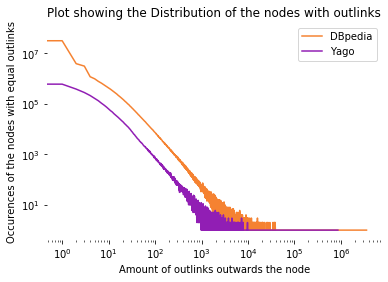

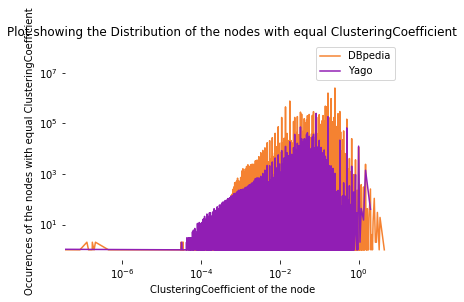

In [29]:
plotting(FileListInconsistency, FileListKB, "")


In [ ]:
plots.plotting(FileListInconsistency, FileListKB, "")

In [ ]:
tables.tabling(FileListInconsistency, FileListKB)

In [ ]:
tables.tabling(FileListInconsistencySample, FileListKBSample)